In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/app.csv')

In [3]:
df.head()

,App,Rating,Reviews,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,Free,0,Everyone
1,Coloring book moana,3.9,967,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,Free,0,Everyone
3,Sketch - Draw & Paint,4.5,215644,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,4.3,967,Free,0,Everyone


In [4]:
df1 = df.copy()

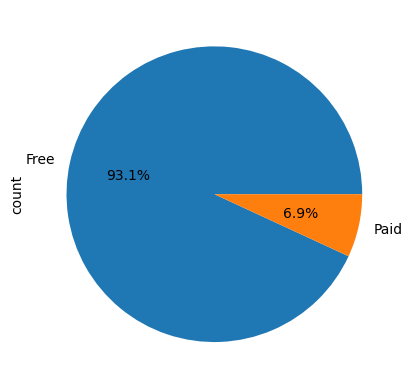

In [5]:
# Type and Content Rating
df1['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

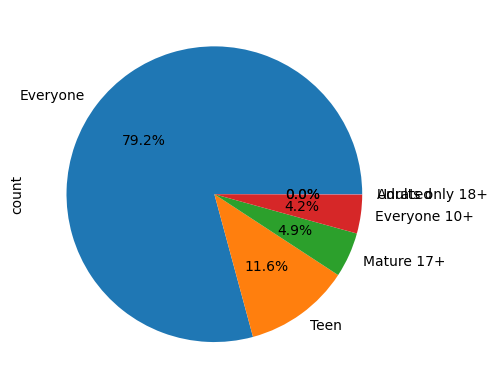

In [6]:
df1['Content Rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

## **Encode Categorical Data**

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

content_rating_le = pd.DataFrame(le.fit_transform(df1['Content Rating']), columns=['Content_rating_le'])
content_rating_le.head()

,Content_rating_le
0,1
1,1
2,1
3,4
4,1


In [8]:
content_rating_le['Content_rating_le'].unique()

array([1, 4, 2, 3, 0, 5])

In [9]:
df1['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [10]:
# One hot encoding
df_one_hot = pd.get_dummies(df1, columns=['Type','Content Rating'], drop_first=True)
df_one_hot.head()

,App,Rating,Reviews,Price,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,0,False,True,False,False,False,False
1,Coloring book moana,3.9,967,0,False,True,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,0,False,True,False,False,False,False
3,Sketch - Draw & Paint,4.5,215644,0,False,False,False,False,True,False
4,Pixel Draw - Number Art Coloring Book,4.3,967,0,False,True,False,False,False,False


In [11]:
# Mannual encoding
df1['Type'].unique()

array(['Free', nan, 'Paid'], dtype=object)

In [12]:
# dropping missing values
df1.dropna(inplace=True)

In [13]:
df1['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [14]:
df1['Type'] = df1['Type'].replace({'Free':0, 'Paid':1})

In [15]:
df1['Type'].unique()

array([0, 1])

In [16]:
df1.head()

,App,Rating,Reviews,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,0,0,Everyone
1,Coloring book moana,3.9,967,0,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,0,0,Everyone
3,Sketch - Draw & Paint,4.5,215644,0,0,Teen
4,Pixel Draw - Number Art Coloring Book,4.3,967,0,0,Everyone


In [17]:
df1['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [18]:
df1['Content Rating'] = df1['Content Rating'].replace({'Everyone':0, 'Teen' : 1, 'Everyone 10+':2, 'Mature 17+':3,
       'Adults only 18+':4, 'Unrated':5})

In [19]:
df1['Content Rating'].unique()

array([0, 1, 2, 3, 4, 5])

In [20]:
df1.head()

,App,Rating,Reviews,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,0,0,0
1,Coloring book moana,3.9,967,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,0,0,0
3,Sketch - Draw & Paint,4.5,215644,0,0,1
4,Pixel Draw - Number Art Coloring Book,4.3,967,0,0,0


## **Functions for data cleaning**

In [21]:
df2 = df.copy()

In [22]:
df2.head()

,App,Rating,Reviews,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,Free,0,Everyone
1,Coloring book moana,3.9,967,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,Free,0,Everyone
3,Sketch - Draw & Paint,4.5,215644,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,4.3,967,Free,0,Everyone


In [23]:
df2['Price'].value_counts()

,count
Price,
0,8715
$2.99,114
$0.99,106
$4.99,70
$1.99,59
...,...
$1.29,1
$299.99,1
$379.99,1


In [24]:
# Data Cleaning
df2['Price'] = df2['Price'].str.replace('$', '')

In [25]:
# changing the data type
# df2['Price'] = df2['Price'].astype('int')
df2['Price'] = pd.to_numeric(df2['Price'], errors='coerce')

In [26]:
df2['Price'].value_counts()

,count
Price,
0.00,8715
2.99,114
0.99,106
4.99,70
1.99,59
...,...
1.29,1
299.99,1
379.99,1


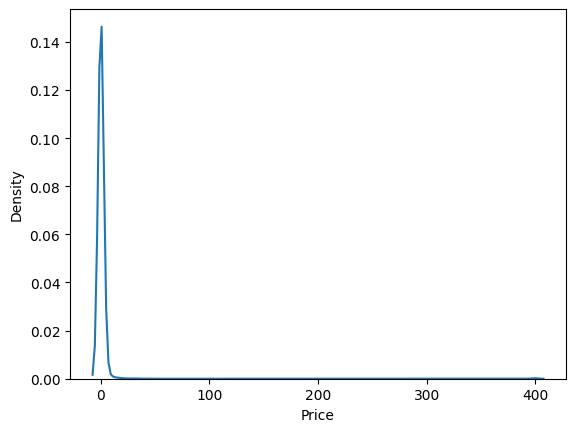

In [27]:
sns.kdeplot(df2['Price'])
plt.show()

In [28]:
# df.set_index(): used to set existing column of a dataframe as dataframe index
# df['App'].nunique()

In [29]:
# df.drop_duplicates(inplace=True)

In [30]:
# df['App'].nunique()

In [31]:
# df = df.set_index('App')

In [32]:
# df.head()

## **Normalization and Scaling**

In [33]:
# Enconding Categorical features
df3 = df.copy()

In [34]:
df3.head()

,App,Rating,Reviews,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,Free,0,Everyone
1,Coloring book moana,3.9,967,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,Free,0,Everyone
3,Sketch - Draw & Paint,4.5,215644,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,4.3,967,Free,0,Everyone


In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Rating          9352 non-null   float64
 2   Reviews         9360 non-null   int64  
 3   Type            9344 non-null   object 
 4   Price           9360 non-null   object 
 5   Content Rating  9360 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 438.9+ KB


In [36]:
df3.isnull().sum()

,0
App,0
Rating,8
Reviews,0
Type,16
Price,0
Content Rating,0


In [37]:
df3.dropna(inplace=True)

In [38]:
df3.isnull().sum()

,0
App,0
Rating,0
Reviews,0
Type,0
Price,0
Content Rating,0


In [39]:
df3.shape


(9337, 6)

In [40]:
df3['Price'] = df3['Price'].str.replace('$', '').astype(float)

In [41]:
df_final = pd.get_dummies(df3, columns=['Type', 'Content Rating'], drop_first=True)
df_final.head()

,App,Rating,Reviews,Price,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,0.0,False,True,False,False,False,False
1,Coloring book moana,3.9,967,0.0,False,True,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,0.0,False,True,False,False,False,False
3,Sketch - Draw & Paint,4.5,215644,0.0,False,False,False,False,True,False
4,Pixel Draw - Number Art Coloring Book,4.3,967,0.0,False,True,False,False,False,False


In [42]:
df_final.dtypes

,0
App,object
Rating,float64
Reviews,int64
Price,float64
Type_Paid,bool
Content Rating_Everyone,bool
Content Rating_Everyone 10+,bool
Content Rating_Mature 17+,bool
Content Rating_Teen,bool
Content Rating_Unrated,bool


In [43]:
# dropping irrevalent columns
df_final = df_final.drop(['App', 'Price'], axis=1)

In [44]:
# Convert all boolean values (True/False) to integers (1/0)
df_final = df_final.astype(int)

# Check the result
df_final.head()

,Rating,Reviews,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4,159,0,1,0,0,0,0
1,3,967,0,1,0,0,0,0
2,4,87510,0,1,0,0,0,0
3,4,215644,0,0,0,0,1,0
4,4,967,0,1,0,0,0,0


In [45]:
# Min-Max Scaling(Normalization)

from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

df_min_max = df_final.copy()

df_min_max.iloc[:, :2] = min_max.fit_transform(df_min_max.iloc[:, :2])
df_min_max.head()

,Rating,Reviews,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.75,0.000002,0,1,0,0,0,0
1,0.50,0.000012,0,1,0,0,0,0
2,0.75,0.001120,0,1,0,0,0,0
3,0.75,0.002759,0,0,0,0,1,0
4,0.75,0.000012,0,1,0,0,0,0


In [46]:
# Max Absolute Scaling

from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()

df_mas = df_final.copy()
df_mas.iloc[:, :2] = mas.fit_transform(df_mas.iloc[:, :2])
df_mas.head()

,Rating,Reviews,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.8,0.000002,0,1,0,0,0,0
1,0.6,0.000012,0,1,0,0,0,0
2,0.8,0.001120,0,1,0,0,0,0
3,0.8,0.002759,0,0,0,0,1,0
4,0.8,0.000012,0,1,0,0,0,0


In [47]:
# Standard Scaler(Standardization)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaler = df_final.copy()

df_scaler.iloc[:, :2] = scaler.fit_transform(df_scaler.iloc[:, :2])
df_scaler.head()

,Rating,Reviews,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.392411,-0.163647,0,1,0,0,0,0
1,-1.386203,-0.163390,0,1,0,0,0,0
2,0.392411,-0.135904,0,1,0,0,0,0
3,0.392411,-0.095209,0,0,0,0,1,0
4,0.392411,-0.163390,0,1,0,0,0,0


## **Data Transformation**

In [48]:
df4 = df.copy()

In [49]:
df4.head()

,App,Rating,Reviews,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,Free,0,Everyone
1,Coloring book moana,3.9,967,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,Free,0,Everyone
3,Sketch - Draw & Paint,4.5,215644,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,4.3,967,Free,0,Everyone


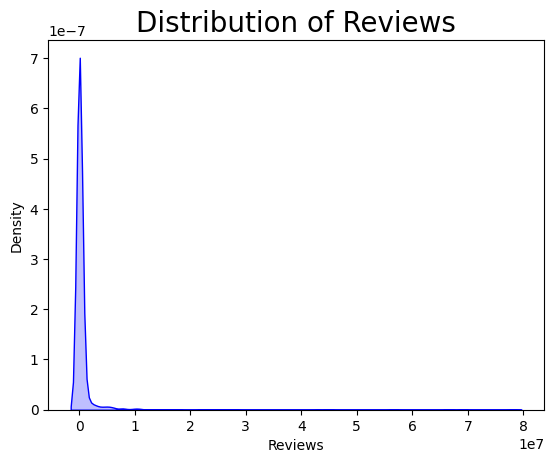

In [50]:
# checking the distribution of reviews
sns.kdeplot(df4['Reviews'], color='blue', shade=True)
plt.title('Distribution of Reviews', size=20)
plt.show()

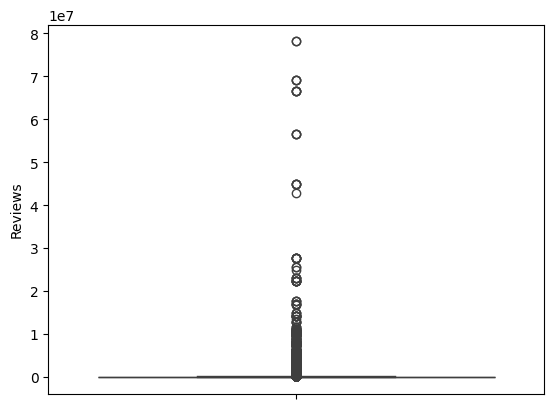

In [51]:
sns.boxplot(df4['Reviews'])
plt.show()

In [52]:
# Log tranformation to reduce skewness and remove outliers
df4['Reviews'] = np.log(df4['Reviews'])
df4.head()

,App,Rating,Reviews,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,5.068904,Free,0,Everyone
1,Coloring book moana,3.9,6.874198,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,11.379508,Free,0,Everyone
3,Sketch - Draw & Paint,4.5,12.281384,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,4.3,6.874198,Free,0,Everyone


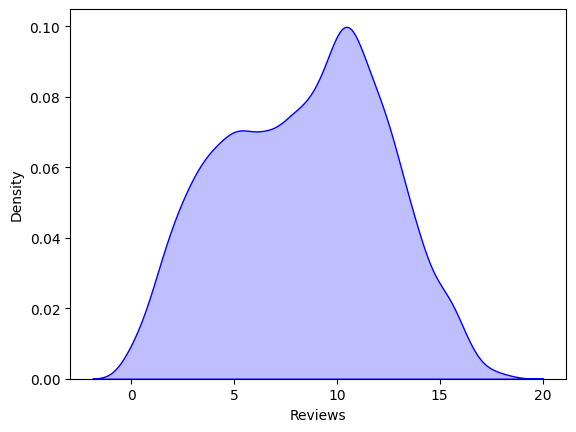

In [53]:
sns.kdeplot(df4['Reviews'], color="blue", shade = True)
plt.show()

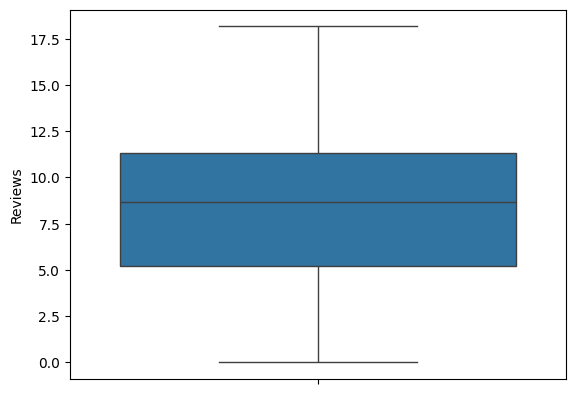

In [54]:
sns.boxplot(df4['Reviews'])
plt.show()

## **Feature Engineering**

In [55]:
df5 = df.copy()

In [56]:
# creating new feature from Rating as High and Low category
Rating_Category = dict()
for i in range(0, len(df5['Rating'])):
  if df5['Rating'].iloc[i] >= 3.5:
    Rating_Category[i] = 'High'
  else:
    Rating_Category[i] = 'Low'

# adding the new feature to data
final_df = df5.assign(Rating_Category = pd.Series(Rating_Category).values)
final_df.head()

,App,Rating,Reviews,Type,Price,Content Rating,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,Free,0,Everyone,High
1,Coloring book moana,3.9,967,Free,0,Everyone,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,Free,0,Everyone,High
3,Sketch - Draw & Paint,4.5,215644,Free,0,Teen,High
4,Pixel Draw - Number Art Coloring Book,4.3,967,Free,0,Everyone,High


In [57]:
# Using lambda functions
df5['category'] = df5.apply(lambda x : 'High' if (x['Rating']) > 3.5 else 'Low', axis=1)
df5.head()

,App,Rating,Reviews,Type,Price,Content Rating,category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,Free,0,Everyone,High
1,Coloring book moana,3.9,967,Free,0,Everyone,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,Free,0,Everyone,High
3,Sketch - Draw & Paint,4.5,215644,Free,0,Teen,High
4,Pixel Draw - Number Art Coloring Book,4.3,967,Free,0,Everyone,High


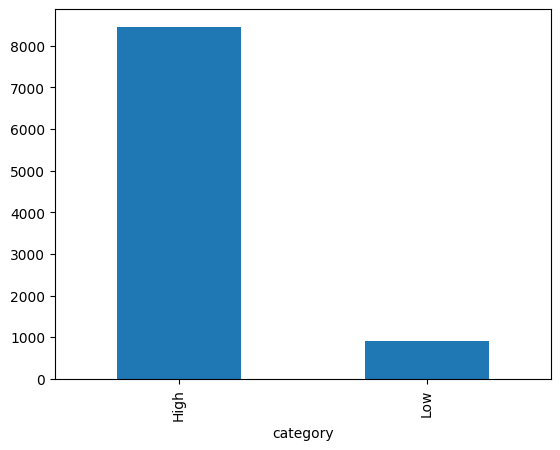

In [58]:
df5['category'].value_counts().plot(kind='bar')
plt.show()